<a href="https://colab.research.google.com/github/mehtab123-4/Ai-Lab/blob/main/Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Original shape: (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


100%|██████████| 14640/14640 [00:00<00:00, 21835.35it/s]


🧹 Cleaned shape: (14173, 16)

📊 Word Count Statistics:


,word_count
count,14173.000000
mean,16.174769
std,6.599122
min,1.000000
25%,11.000000
50%,17.000000
75%,22.000000
max,31.000000


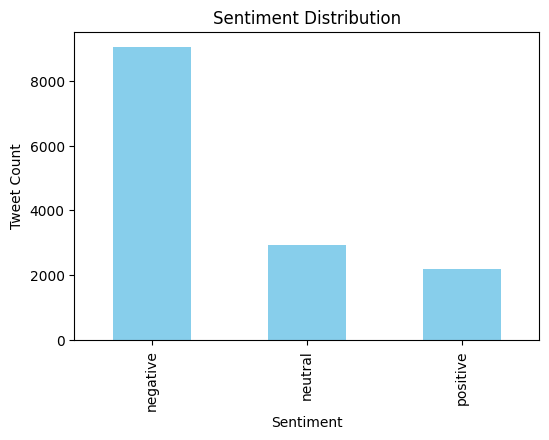


🧩 Random Tweet Samples:


,text,clean_text,airline_sentiment,word_count
13215,@AmericanAir flight home Cancelled Flightled t...,flight home cancelled flightled today any way ...,negative,24
11310,@USAirways I have been doing that all day. Can...,i have been doing that all day cant find my ba...,negative,24
10871,"@USAirways Yes, I get that. I’m asking: Specif...",yes i get that im asking specifically what wil...,neutral,17
11588,@USAirways your saving grace was our flight at...,your saving grace was our flight attendant dal...,negative,23
9710,@USAirways nightmare trying to get to Costa Ri...,nightmare trying to get to costa rica from phl...,negative,19
7694,@JetBlue Why did you interupt the Staduim Seri...,why did you interupt the staduim series on i d...,negative,19
915,@united @reebok @rockinwellness @ Denver Inter...,denver international airport,positive,3
2120,@united I went from Sacramento to Minneapolis ...,i went from sacramento to minneapolis at the e...,neutral,14
2791,"@united as for volunteers to give up seats, pe...",as for volunteers to give up seats people did ...,negative,23
2561,@united typically once you get the problem fix...,typically once you get the problem fixed then ...,negative,19



✅ Cleaned file saved as cleaned_twitter_airline.csv


In [ ]:
# ---------------- Twitter Airline Sentiment Cleaning + EDA ----------------
import pandas as pd
import re
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

# Load dataset (after upload)
df = pd.read_csv("/content/Tweets.csv", encoding='utf-8')

print("✅ Original shape:", df.shape)
display(df.head(3))

# Clean text
def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r'@[\w]+', '', text)             # remove @mentions
    text = re.sub(r'http\S+|www\S+', '', text)     # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)           # remove punctuation/emojis
    text = re.sub(r'\s+', ' ', text).strip()       # collapse spaces
    return text

df['clean_text'] = df['text'].progress_apply(clean_tweet)

# Drop empty or duplicate
df = df[df['clean_text'] != ''].drop_duplicates(subset=['clean_text'])
print("🧹 Cleaned shape:", df.shape)

# Add word count
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

# Basic stats
print("\n📊 Word Count Statistics:")
display(df['word_count'].describe())

# Sentiment distribution
plt.figure(figsize=(6,4))
df['airline_sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

# Random examples
print("\n🧩 Random Tweet Samples:")
display(df.sample(10)[['text', 'clean_text', 'airline_sentiment', 'word_count']])

# Save cleaned version
df.to_csv("/content/cleaned_twitter_airline.csv", index=False)
print("\n✅ Cleaned file saved as cleaned_twitter_airline.csv")
